In [6]:
!pip install --user -r requirements.txt

     |████████████████████████████████| 65.1MB 60kB/s 
     |████████████████████████████████| 1.3MB 36.6MB/s 
     |████████████████████████████████| 266kB 34.2MB/s 
     |████████████████████████████████| 327kB 54.0MB/s 
     |████████████████████████████████| 20.4MB 1.8MB/s 
     |████████████████████████████████| 61kB 6.1MB/s 
     |████████████████████████████████| 48.5MB 123kB/s 
     |████████████████████████████████| 13.0MB 43.3MB/s 
     |████████████████████████████████| 51kB 5.0MB/s 
     |████████████████████████████████| 133kB 44.3MB/s 
     |████████████████████████████████| 215.7MB 67kB/s 
     |████████████████████████████████| 1.5MB 27.5MB/s 
     |████████████████████████████████| 184kB 21.1MB/s 
     |████████████████████████████████| 460kB 47.5MB/s 
     |████████████████████████████████| 82.0MB 83kB/s 
     |████████████████████████████████| 92kB 7.9MB/s 
     |████████████████████████████████| 81kB 7.3MB/s 
     |████████████████████████████████| 317kB 37.2MB/s 
 

In [1]:
!pip install --upgrade --user -e git+https://github.com/twintproject/twint.git@origin/master#egg=twint

Obtaining twint from git+https://github.com/twintproject/twint.git@origin/master#egg=twint
  Cloning https://github.com/twintproject/twint.git (to revision origin/master) to ./src/twint
  Running command git clone -q https://github.com/twintproject/twint.git /content/src/twint
  Running command git checkout -q origin/master
  Created wheel for fake-useragent: filename=fake_useragent-0.1.11-cp36-none-any.whl size=13485 sha256=ad2045d6c2139c3908786e3f9925986ce73963d37c0c492ca90e0a33c1820dd9
  Stored in directory: /root/.cache/pip/wheels/5e/63/09/d1dc15179f175357d3f5c00cbffbac37f9e8690d80545143ff
  Created wheel for googletransx: filename=googletransx-2.4.2-cp36-none-any.whl size=15971 sha256=38ace0a91af7dead76c07353ee5efea011c6201fe14147dbcb3520ada710e15c
  Stored in directory: /root/.cache/pip/wheels/04/63/5f/75e7e94eb62517946116a783e4cd8970c4789c990bbc732616
Successfully built fake-useragent googletransx
  Running setup.py develop for twint


In [2]:
!mv src/twint .
!rm -r src

In [3]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append("twint/")

In [4]:
import twint

In [5]:
from optimus import Optimus
op = Optimus()

/content


/root/.local/lib/python3.6/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [6]:
# Solve compatibility issues with notebooks and RunTime errors.
import nest_asyncio
nest_asyncio.apply()

In [7]:
import string

In [8]:
from textblob import TextBlob
from IPython.display import Markdown, display

In [9]:
import seaborn as sns

In [13]:
def search_before(search):
  c = twint.Config()
  c.Search = search
# Custom output format
  c.Format = "{username} | {tweet}"
  c.Until = '2019-12-31'
  c.Since = '2019-12-01'
  c.Lang="en"
  c.Limit = 1
  c.Pandas = True

  twint.run.Search(c)
  Tweets_df = twint.storage.panda.Tweets_df
  Tweets_before = Tweets_df[['date', 'tweet', 'user_id', 'username']]

  for char in string.punctuation:
    Tweets_before['tweet'] = Tweets_before['tweet'].str.replace(char, '')
  
  tweets2 = Tweets_before['tweet'].tolist()

  lst = []
  for tweet in tweets2:
    analysis = TextBlob(tweet)
    if analysis.sentiment[0]>0:
        lst.append(1)
    elif analysis.sentiment[0]<0:
        lst.append(-1)
    else:
        lst.append(0)
  
  Tweets_before["Sentiments"] = lst
  return sns.distplot(Tweets_before['Sentiments'])


youkillmyangel | it feels so strange to know i started the decade being obsessed with one direction and feeling at home while investing my time on those babies
BogOtter | Got an absolutely incredible present today from Moogletart honoring Snapples, who we lost in 2019, and welcoming Fizzgig. Feeling very grateful for the amazing people in my life.   My reaction:   https://t.co/SxTqYJyNmg  https://t.co/g67DISDYHH
PortalTracklist | @ohliv_ia What a Feeling podia ser a junção de gerações! A pegada Fleetwood Mac podia chamar atenção dos mais velhos e mesmo assim nada. Coloca injustiçado nisso!
besoindecou | I’m feeling ignorant today
LarryLNichols | If you're feeling like The LORD has abandoned you, please take time to honestly evaluate how much time you're spending alone w/ HIM in quiet, undisturbed, HEART to HEART PRAYER &amp; daily reading HIS WORD; The Bible. In our relationships w/ GOD &amp; JESUS - it isn't THEM who walk away!
purnya2 | @RadDoodCoolTude stay still and consume that'll


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


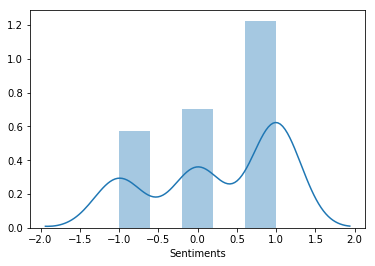

In [14]:
search_before('feeling')

In [19]:
def search_after(search):
  d = twint.Config()
  d.Search = search
# Custom output format
  d.Format = "{username} | {tweet}"
  d.Until = '2020-03-31'
  d.Since = '2020-03-01'
  d.Lang="en"
  d.Limit = 1
  d.Pandas = True

  twint.run.Search(d)

  Tweets_df = twint.storage.panda.Tweets_df
  Tweets_after = Tweets_df[['date', 'tweet', 'user_id', 'username']]

  for char in string.punctuation:
    Tweets_after['tweet'] = Tweets_after['tweet'].str.replace(char, '')
  
  tweets3 = Tweets_after['tweet'].tolist()

  lst = []
  for tweet in tweets3:
    analysis = TextBlob(tweet)
    if analysis.sentiment[0]>0:
        lst.append(1)
    elif analysis.sentiment[0]<0:
        lst.append(-1)
    else:
        lst.append(0)
  
  Tweets_after["Sentiments"] = lst

  return sns.distplot(Tweets_after['Sentiments'])

cxweak | feeling: small
Sephrit | With my computer gone I’ve had a lot of free time and I’m getting the feeling I haven’t had since high school or it could be sEaSoNaL dEpReSsIoN
MonsterEnergyP5 | @FBI @FBIChicago @sophie_swaney @GovBillLee  this girl is getting into people hearts and harassing and will not stop in eads Tennessee feeling out stone county
ThemDems | @Teesa_Michele I wish it made me feel better. Unfortunately, it only leaves me feeling defeated. You can’t fix stupid. 💔  https://t.co/TvGQvEvhsF
TylerOrbits | I’m not feeling blockberry at all with this bullcrap give my girls some freedom damn!!! THEY FINALLY WON A MUSIC SHOW for gods sake   #LOONASNSFREEDOM
NOLABelle83 | @eyelinerandrose Are you feeling better?
nateslate | @ThatEricAlper More Than A Feeling - Boston
JosephPMathews | @daniscoville I definitely sent the feeling wheel to the 8 we used to talk about
Shiverwarp | @chipzel "The most" is so hard to answer. The first movie that came to my mind for evocative and be


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


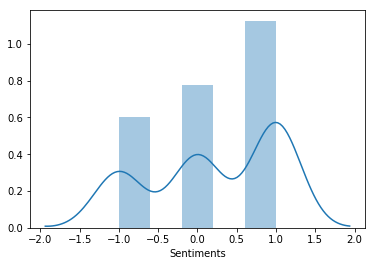

In [20]:
search_after('feeling')

In [24]:
# IGNORE THE CODE AFTER THIS POINT
# IGNORE THE CODE AFTER THIS POINT
# IGNORE THE CODE AFTER THIS POINT
# IGNORE THE CODE AFTER THIS POINT
# IGNORE THE CODE AFTER THIS POINT
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#

In [ ]:
# # Set up TWINT config
# c = twint.Config()

In [ ]:
# c.Search = "feeling OR live"
# # Custom output format
# c.Format = "{username} | {tweet}"
# c.Until = '2019-12-31'
# c.Since = '2019-12-01'
# c.Lang="en"
# c.Limit = 1
# c.Pandas = True

In [25]:
# twint.run.Search(c)

In [ ]:
# Tweets_df = twint.storage.panda.Tweets_df

In [26]:
# Tweets_df.head()

In [ ]:
# Tweets_before = Tweets_df[['date', 'tweet', 'user_id', 'username']]

In [27]:
# Tweets_before.head()

In [28]:
# Tweets_before.shape

In [29]:
# Tweets_df.shape

In [30]:
# for char in string.punctuation:
#     Tweets_before['tweet'] = Tweets_before['tweet'].str.replace(char, '')


In [31]:
# Tweets_before

In [32]:
# tweets2 = Tweets_before['tweet'].tolist()

In [33]:
# tweets2[:2]

In [34]:
# # Pretty printing the result
# def printmd(string, color=None):
#     colorstr = "<span style='color:{}'>{}</span>".format(color, string)
#     display(Markdown(colorstr))

# for tweet in tweets2:
#     print(tweet)
#     analysis = TextBlob(tweet)
#     print(analysis.sentiment)
#     if analysis.sentiment[0]>0:
#         printmd('Positive', color="green")
#     elif analysis.sentiment[0]<0:
#         printmd('Negative', color="red")
#     else:
#         printmd("No result", color="grey")
#         print("")

In [ ]:
# lst = []
# for tweet in tweets2:
#     analysis = TextBlob(tweet)
#     if analysis.sentiment[0]>0:
#         lst.append(1)
#     elif analysis.sentiment[0]<0:
#         lst.append(-1)
#     else:
#         lst.append(0)

In [35]:
# lst[:5]

In [36]:
# Tweets_before["Sentiments"] = lst

In [37]:
# Tweets_before.head()

In [ ]:
# Tweets_before.to_csv('A.csv')

In [ ]:
# d = twint.Config()

In [ ]:
# d.Search = "feeling OR live"
# # Custom output format
# d.Format = "{username} | {tweet}"
# d.Until = '2020-03-31'
# d.Since = '2020-03-01'
# d.Lang="en"
# d.Limit = 1
# d.Pandas = True

In [38]:
# twint.run.Search(d)

In [ ]:
# Tweets_df = twint.storage.panda.Tweets_df

In [ ]:
# Tweets_after = Tweets_df[['date', 'tweet', 'user_id', 'username']]

In [39]:
# Tweets_after.head()

In [40]:
# for char in string.punctuation:
#     Tweets_after['tweet'] = Tweets_after['tweet'].str.replace(char, '')

In [ ]:
# tweets3 = Tweets_after['tweet'].tolist()

In [ ]:
# lst2 = []
# for tweet in tweets3:
#     analysis = TextBlob(tweet)
#     if analysis.sentiment[0]>0:
#         lst2.append(1)
#     elif analysis.sentiment[0]<0:
#         lst2.append(-1)
#     else:
#         lst2.append(0)

In [41]:
# lst2[:5]

In [42]:
# Tweets_after["Sentiments"] = lst2

In [43]:
# Tweets_after.head()

In [ ]:
# Tweets_after.to_csv('C.csv')

In [44]:
# sns.distplot(Tweets_after['Sentiments'])


In [45]:
# sns.distplot(Tweets_before['Sentiments'])